In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('indian_liver_patient.csv')

In [207]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [208]:
df.shape

(583, 11)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [210]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


C:\Users\gracj\AppData\Local\Temp\ipykernel_4988\474187256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

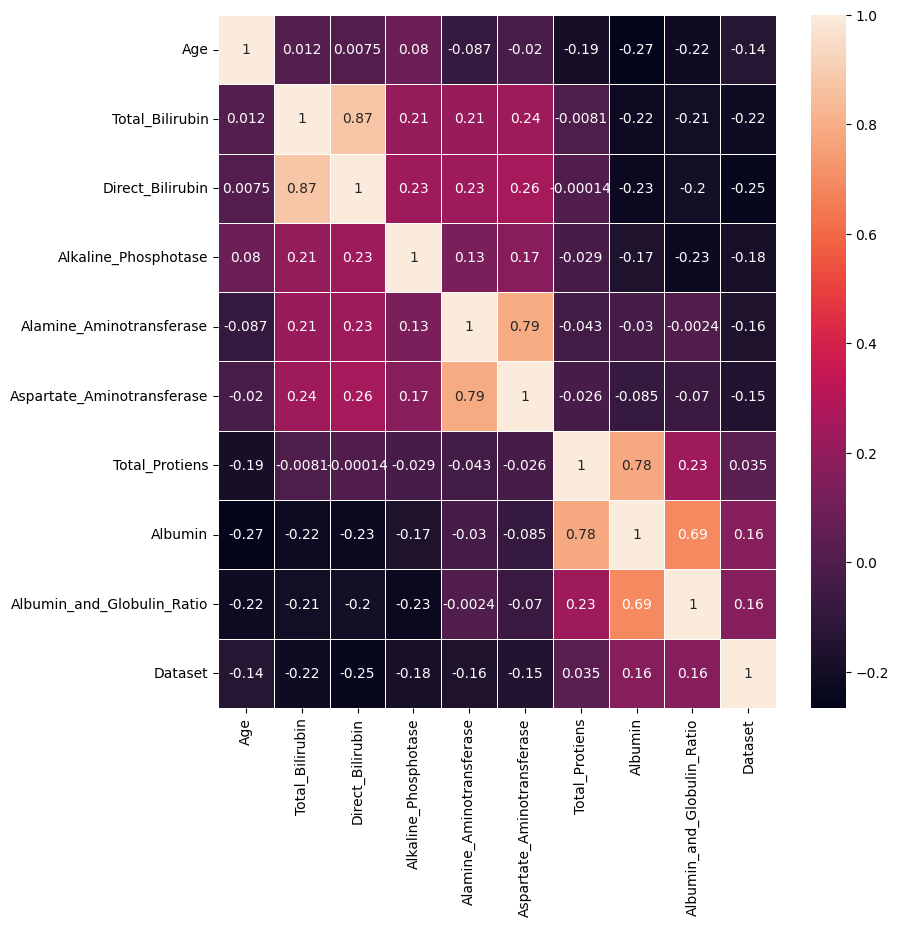

In [211]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

In [212]:
df.rename(columns={'Dataset':'Is_ill'}, inplace=True)

In [213]:
print ('Ill : {} '.format(df.Is_ill.value_counts()[1]))
print ('Healthy : {} '.format(df.Is_ill.value_counts()[2]))

Ill : 416 
Healthy : 167 


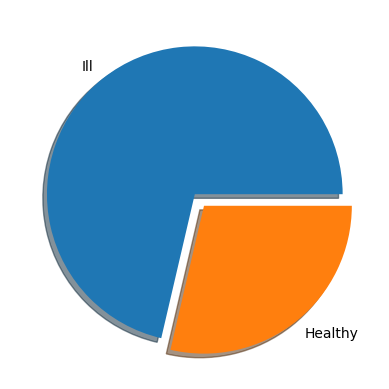

In [214]:
plt.pie(x=df["Is_ill"].value_counts(), 
        labels=["Ill","Healthy"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

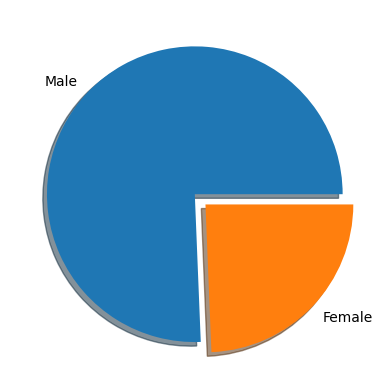

In [215]:
plt.pie(x=df["Gender"].value_counts(),  
        labels=["Male","Female"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

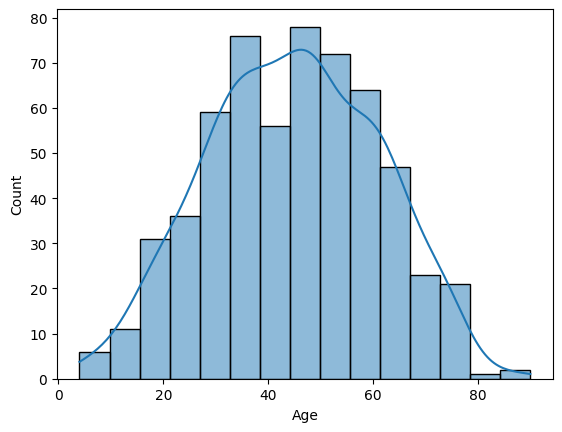

In [216]:
sns.histplot(x=df["Age"], kde=True)

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder
)
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

tx_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("tx_encoder", OneHotEncoder(sparse_output=False)),
    ])

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_ill
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [218]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "Total_Bilirubin", "Direct_Bilirubin",
               "Alkaline_Phosphotase", "Alamine_Aminotransferase",
               "Aspartate_Aminotransferase", "Total_Protiens",
               "Albumin", "Albumin_and_Globulin_Ratio"]
# If u add "Is_ill to list, all models will show 100% accuracy"
tx_attribs = ["Gender"]

prepprocess_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('tx', tx_pipeline, tx_attribs)
])

In [219]:
df_transform = prepprocess_pipeline.fit_transform(df)

In [220]:
X = df_transform 
y = df ['Is_ill']
print(X[10])
print(y)

[ 0.75753604 -0.43499596 -0.49396398 -0.33195929 -0.1628464  -0.17636295
 -0.53774048 -0.55590379 -0.46177484  0.          1.        ]
0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Is_ill, Length: 583, dtype: int64


In [221]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc_clf.fit(X_train, y_train)
rfc_clf.score(X_val, y_val)

0.7521367521367521

In [223]:
from sklearn.model_selection import cross_val_score

rfc_clf_score = cross_val_score(rfc_clf, X_train, y_train, cv=10)
rfc_clf_score.mean()

0.6932932469935246

In [224]:
from sklearn.svm import SVC

svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)
svc_clf.score(X_val, y_val)

0.7435897435897436

In [225]:
svc_clf_scores = cross_val_score(svc_clf, X_train, y_train, cv=10)
svc_clf_scores.mean()

0.7060592044403331